# Exploring Data with Python

A significant part of a a data scientist's role is to explore, analyze, and visualize data. There are many tools and programming languages that they can use to do this. One of the most popular approaches is to use Jupyter notebooks (like this one) and Python.

Python is a flexible programming language that's used in a wide range of scenarios, from web applications to device programming. It's extremely popular in the data-science and machine-learning communities because of the many packages it supports for data analysis and visualization.

In this notebook, we'll explore some of these packages and apply basic techniques to analyze data. This isn't intended to be a comprehensive Python programming exercise or even a deep dive into data analysis. Rather, it's intended as a crash course in some of the common ways in which data scientists can use Python to work with data.

> **Note**: If you've never used the Jupyter Notebooks environment before, there are a few things of which you should be aware:
> 
> - Notebooks are made up of *cells*. Some cells (like this one) contain *markdown* text, while others (like the one following this one) contain code.
> - You can run each code cell by using the **&#9658; Run** button. The **&#9658; Run** button shows up when you hover over the cell.
> - The output from each code cell is displayed immediately below the cell.
> - Even though you can run the code cells individually, some variables the code uses are global to the notebook. That means that you should run all of the code cells <u>**in order**</u>. There might be dependencies between code cells, so if you skip a cell, subsequent cells might not run correctly.
> 


## Exploring data arrays with NumPy

Let's start by looking at some simple data.

Suppose a college professor takes a sample of student grades from a class to analyze.

Run the code in the following cell by selecting the **&#9658; Run** button to see the data.

In [6]:
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
print(data, "\n", type(data))
print(len(data))

[50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64] 
 <class 'list'>
22


The data has been loaded into a Python **list** structure, which is a good data type for general data manipulation, but it's not optimized for numeric analysis. For that, we're going to use the **NumPy** package, which includes specific data types and functions for working with *Num*bers in *Py*thon.

Run the following cell to load the data into a NumPy **array**.

In [4]:
import numpy as np

grades = np.array(data)
print(grades, "\n", type(grades) )

[50 50 47 97 49  3 53 42 26 74 82 62 37 15 70 27 36 35 48 52 63 64] 
 <class 'numpy.ndarray'>


Just in case you're wondering about the differences between a list and a NumPy array, let's compare how these data types behave when we use them in an expression that multiplies them by two.

In [5]:
print(type(data),'x 2:', data * 2)
print('---')
print(type(grades),'x 2:', grades * 2)

<class 'list'> x 2: [50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64, 50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]
---
<class 'numpy.ndarray'> x 2: [100 100  94 194  98   6 106  84  52 148 164 124  74  30 140  54  72  70
  96 104 126 128]


Note that multiplying a list by two creates a new list of twice the length with the original sequence of list elements repeated. Multiplying a NumPy array, on the other hand, performs an element-wise calculation in which the array behaves like a *vector*, so we end up with an array of the same size in which each element has been multiplied by two.

The key takeaway from this is that NumPy arrays are specifically designed to support mathematical operations on numeric data, which makes them more useful for data analysis than a generic list.

You might have spotted that the class type for the preceding NumPy array is **numpy.ndarray**. The **nd** indicates that this is a structure that can consist of multiple *dimensions*. (It can have *n* dimensions.) Our specific instance has a single dimension of student grades.

Run the following cell to view the **shape** of the array.

In [7]:
grades.shape

(22,)

The shape confirms that this array has only one dimension, which contains 22 elements. (There are 22 grades in the original list.) You can access the individual elements in the array by their zero-based ordinal position. Let's get the first element (the one in position 0).

In [8]:
grades[0]

50

Now that you know your way around a NumPy array, it's time to perform some analysis of the grades data.

You can apply aggregations across the elements in the array, so let's find the simple average grade (in other words, the *mean* grade value).

In [9]:
grades.mean()

49.18181818181818

So the mean grade is just around 50, more or less in the middle of the possible range from 0 to 100.

Let's add a second set of data for the same students. This time, we'll record the typical number of hours per week they devoted to studying.

In [10]:
# Define an array of study hours
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

# Create a 2D array (an array of arrays)
student_data = np.array([study_hours, grades])

# display the array
student_data

array([[10.  , 11.5 ,  9.  , 16.  ,  9.25,  1.  , 11.5 ,  9.  ,  8.5 ,
        14.5 , 15.5 , 13.75,  9.  ,  8.  , 15.5 ,  8.  ,  9.  ,  6.  ,
        10.  , 12.  , 12.5 , 12.  ],
       [50.  , 50.  , 47.  , 97.  , 49.  ,  3.  , 53.  , 42.  , 26.  ,
        74.  , 82.  , 62.  , 37.  , 15.  , 70.  , 27.  , 36.  , 35.  ,
        48.  , 52.  , 63.  , 64.  ]])

Now the data consists of a two-dimensional array; an array of arrays. Let's look at its shape.

In [11]:
# Show shape of 2D array
student_data.shape

(2, 22)

The **student_data** array contains two elements, each of which is an array containing 22 elements.

To navigate this structure, you need to specify the position of each element in the hierarchy. So to find the first value in the first array (which contains the study hours data), you can use the following code.

In [12]:
# Show the first element of the first element
student_data[0][0]

10.0

Now you have a multidimensional array containing both the student's study time and grade information, which you can use to compare study time to a student's grade.

In [13]:
# Get the mean value of each sub-array
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print(f'Average study hours: {avg_study} \n Average grade: {avg_grade}')

Average study hours: 10.522727272727273 
 Average grade: 49.18181818181818


## Exploring tabular data with Pandas

NumPy provides a lot of the functionality and tools you need to work with numbers, such as arrays of numeric values. However, when you start to deal with two-dimensional tables of data, the **Pandas** package offers a more convenient structure to work with: the **DataFrame**.

Run the following cell to import the Pandas library and create a DataFrame with three columns. The first column is a list of student names, and the second and third columns are the NumPy arrays containing the study time and grade data.

In [14]:
import pandas as pd

df_students = pd.read_csv('grades.csv')

df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


Note that in addition to the columns you specified, the DataFrame includes an *index* to uniquely identify each row.

### Finding and filtering data in a DataFrame

You can use the DataFrame's **loc** method with a single pair of square brackets `[ ]` to retrieve data for a specific index value, like this.

In [15]:
# Get the data for index value 5
df_students.loc[5]

Name          Vicky
StudyHours      1.0
Grade           3.0
Name: 5, dtype: object

However, this returns the data in a Pandas Series as opposed to a Pandas Dataframe

In [16]:
type(df_students.loc[5])

pandas.core.series.Series

To retrieve data at the 5th index as a dataframe, we can use two pairs of square brackets in our command.

In [17]:
df_students.loc[[5], :]

,Name,StudyHours,Grade
5,Vicky,1.0,3.0


Note the general syntax is:
```python
df.loc[[row], [column]]
```

>#### But what's the difference between a Pandas Dataframe and a Pandas Series?
>**DataFrame**: A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. Think of it as a spreadsheet or a SQL table. It is generally the most commonly used pandas object.
>
>**Series**: A Series is a one-dimensional array-like object containing a sequence of values (similar to a NumPy array) and an associated array of data labels, called its index. Essentially, a Series is a single column of a DataFrame.

We can also use the single pair of square brackets with the loc method and the slicing technique to get a range of values.

In [18]:
# Get the rows with index values from 0 to 5
df_students.loc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0


In addition to being able to use the **loc** method to find rows based on the index, you can use the **iloc** method to find rows based on their ordinal position in the DataFrame (regardless of the index):

In [19]:
# Get data in the first five rows
df_students.iloc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


Look carefully at the `iloc[0:5]` results and compare them to the `loc[0:5]` results you obtained previously. Can you spot the difference?

The **loc** method returned rows with index *label* in the list of values from *0* to *5*, which includes *0*, *1*, *2*, *3*, *4*, and *5* (six rows). However, the **iloc** method returns the rows in the *positions* included in the range 0 to 5. Since integer ranges don't include the upper-bound value, this includes positions *0*, *1*, *2*, *3*, and *4* (five rows).

**iloc** identifies data values in a DataFrame by *position*, which extends beyond rows to columns. So, for example, you can use it to find the values for the columns in positions 1 and 2 in row 0, like this:

In [20]:
df_students.iloc[0, [1,2]]

StudyHours    10.0
Grade         50.0
Name: 0, dtype: object

Again, this returns a Pandas series. To return a Pandas Dataframe, we need to surround `0` with square brackets as well.

In [21]:
df_students.iloc[[0], [1,2]]

,StudyHours,Grade
0,10.0,50.0


Let's return to the **loc** method and see how it works with columns. Remember that you use **loc** to locate data items based on index values rather than positions. In the absence of an explicit index column, the rows in our DataFrame are indexed as integer values, but the columns are identified by name:

In [22]:
df_students.loc[0, ['StudyHours', 'Grade']]

StudyHours    10.0
Grade         50.0
Name: 0, dtype: object

And to get a Pandas Dataframe:

In [23]:
df_students.loc[[0], ['StudyHours', 'Grade']]

,StudyHours,Grade
0,10.0,50.0


Here's another useful trick. You can use the **loc** method to find indexed rows based on a filtering expression that references named columns other than the index, like this:

In [24]:
df_students.loc[df_students['Name']=='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


Actually, you don't need to explicitly use the **loc** method to do this. You can simply apply a DataFrame filtering expression, like this:

In [25]:
df_students[df_students['Name']=='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


And for good measure, you can achieve the same results by using the DataFrame's **query** method, like this:

In [26]:
df_students.query('Name=="Aisha"')

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


The three previous examples underline a confusing truth about working with Pandas. Often, there are multiple ways to achieve the same results. Another example of this is the way you refer to a DataFrame column name. You can specify the column name as a named index value (as in the `df_students['Name']` examples we've seen so far), or you can use the column as a property of the DataFrame, like this:

In [27]:
df_students[df_students.Name == 'Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


### Handling missing values

One of the most common issues data scientists need to deal with is incomplete or missing data. So how would we know that the DataFrame contains missing values? You can use the **isnull** method to identify which individual values are null, like this:

In [28]:
df_students.isnull()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


Of course, with a larger DataFrame, it would be inefficient to review all of the rows and columns individually, so we can get the sum of missing values for each column like this:

In [29]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

So now we know that there's one missing **StudyHours** value and two missing **Grade** values.

To see them in context, we can filter the DataFrame to include only rows where any of the columns (axis 1 of the DataFrame) are null.

In [30]:
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


When the DataFrame is retrieved, the missing numeric values show up as **NaN** (*not a number*).

So now that we've found the null values, what can we do about them?

One common approach is to *impute* replacement values. For example, if the number of study hours is missing, we could just assume that the student studied for an average amount of time and replace the missing value with the mean study hours. To do this, we can use the **fillna** method, like this:

In [31]:
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())
df_students

,Name,StudyHours,Grade
0,Dan,10.000000,50.0
1,Joann,11.500000,50.0
2,Pedro,9.000000,47.0
3,Rosie,16.000000,97.0
4,Ethan,9.250000,49.0
5,Vicky,1.000000,3.0
6,Frederic,11.500000,53.0
7,Jimmie,9.000000,42.0
8,Rhonda,8.500000,26.0
9,Giovanni,14.500000,74.0


Alternatively, it might be important to ensure that you only use data you know to be absolutely correct. In this case, you can drop rows or columns that contain null values by using the **dropna** method. For example, we'll remove rows (axis 0 of the DataFrame) where any of the columns contain null values:

In [32]:
df_students = df_students.dropna(axis=0, how='any')
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


### Explore data in the DataFrame

Now that we've cleaned up the missing values, we're ready to explore the data in the DataFrame. Let's start by comparing the mean study hours and grades.

In [33]:
# Get the mean study hours using to column name as an index
mean_study = df_students['StudyHours'].mean()

# Get the mean grade using the column name as a property (just to make the point!)
mean_grade = df_students.Grade.mean()

# Print the mean study hours and mean grade
print(f'Average weekly study hours: {mean_study} \n Average grade: {mean_grade}')

Average weekly study hours: 10.522727272727273 
 Average grade: 49.18181818181818


OK, let's filter the DataFrame to find only the students who studied for more than the average amount of time.

In [34]:
# Get students who studied for the mean or more hours
df_students[df_students.StudyHours > mean_study]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


Note that the filtered result is itself a DataFrame, so you can work with its columns just like any other DataFrame.

For example, let's find the average grade for students who undertook more than the average amount of study time.

In [35]:
# What was their mean grade?
df_students[df_students.StudyHours > mean_study].Grade.mean()

66.7

Let's assume that the passing grade for the course is 60.

We can use that information to add a new column to the DataFrame that indicates whether or not each student passed.

First, we'll create a Pandas **Series** containing the pass/fail indicator (True or False), and then we'll concatenate that series as a new column (axis 1) in the DataFrame.

In [36]:
passes  = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


DataFrames are designed for tabular data, and you can use them to perform many of the same kinds of data-analytics operations you can do in a relational database, such as grouping and aggregating tables of data.

For example, you can use the **groupby** method to group the student data into groups based on the **Pass** column you added previously and to count the number of names in each group. In other words, you can determine how many students passed and failed.

In [37]:
print(df_students.groupby(df_students.Pass).Name.count())

Pass
False    15
True      7
Name: Name, dtype: int64


You can aggregate multiple fields in a group using any available aggregation function. For example, you can find the mean study time and grade for the groups of students who passed and failed the course.

In [38]:
print(df_students.groupby(df_students.Pass)[['StudyHours', 'Grade']].mean())

       StudyHours      Grade
Pass                        
False    8.783333  38.000000
True    14.250000  73.142857


DataFrames are amazingly versatile and make it easy to manipulate data. Many DataFrame operations return a new copy of the DataFrame, so if you want to modify a DataFrame but keep the existing variable, you need to assign the result of the operation to the existing variable. For example, the following code sorts the student data into descending order by Grade and assigns the resulting sorted DataFrame to the original **df_students** variable.

In [39]:
# Create a DataFrame with the data sorted by Grade (descending)
df_students = df_students.sort_values('Grade', ascending=False)

# Show the DataFrame
df_students

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


## Summary

NumPy and DataFrames are the workhorses of data science in Python. They provide us ways to load, explore, and analyze tabular data.

In the next section, we'll take a look at how create graphs and explore your data in more interesting ways.

---

# Exploring data with Python - visualize data

In this section, we'll apply a few techniques to analyze data with basic statistics and visualize it using graphs.

## Visualizing data with Matplotlib

DataFrames provide a great way to explore and analyze tabular data, but sometimes a picture is worth a thousand rows and columns. The **Matplotlib** library provides the foundation for plotting data visualizations that can greatly enhance your ability to analyze the data.

Let's start with a simple bar chart that shows the grade of each student.

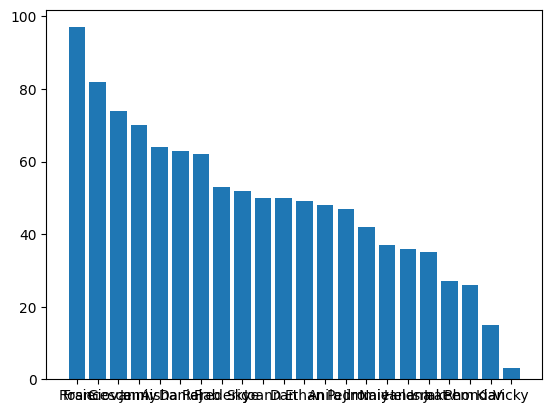

In [40]:
from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

Well, that worked, but the chart could use some improvements to make it clearer what we're looking at.

Note that you used the **pyplot** class from Matplotlib to plot the chart. This class provides many ways to improve the visual elements of the plot. For example, the following code:

- Specifies the color of the bar chart.
- Adds a title to the chart (so we know what it represents)
- Adds labels to the X and Y axes (so we know which axis shows which data)
- Adds a grid (to make it easier to determine the values for the bars)
- Rotates the X markers (so we can read them)

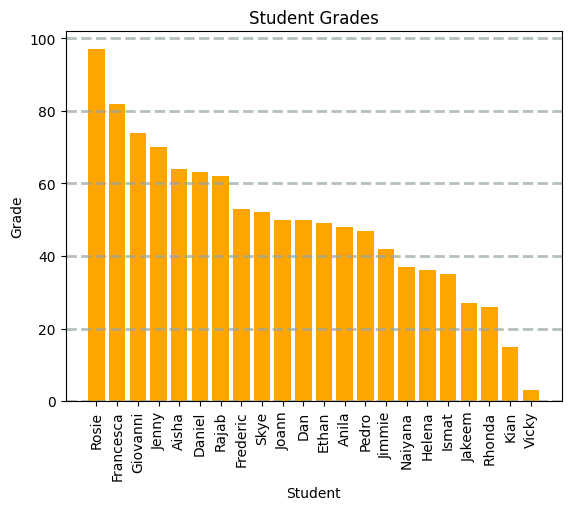

In [41]:
# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

Let's add a pie chart

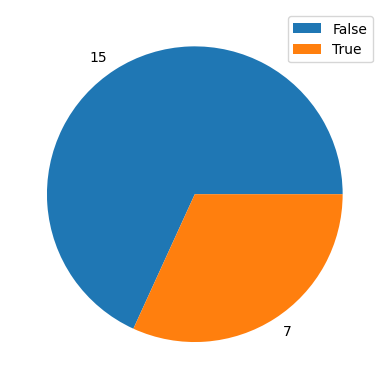

In [42]:
pass_counts = df_students['Pass'].value_counts()
plt.pie(pass_counts, labels=pass_counts)
plt.legend(pass_counts.keys().tolist())

plt.show()